# Experimantal evaluation

This notebook presenets results of experimental evaluation

1. Quality analysis section presents examples of images from test set and output of model (bboxes)
2. Quantity analysis section is responsible for calcuating IoU, Dice score and accuracy metrics on test set.

   Metrics on test set for model from epoch number 6 checkpoint (lowest loss function value):
   - 93% accuracy,
   - 0.74 Dice Score,
   - 0.60 IoU Score.

## Common imports

In [1]:
import os
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import multiprocessing

from config import Config
from checkpoint import laod_model_checkpoint
from dataset import FloorplanSVG
from model import get_pretrained_model
from metrics import calculate_metrics
from visualize import draw_bboxes_on_img

Loaded model from file: /home/jovyan/ml-eng-test-lfs-storage/models/model_6_566.00565.pt


## Download and extract datasat if needed

In [2]:
# if does not work please contact with the repo admin (dataset is stored on google drive)
if not os.path.exists('data/cubicasa5k.zip'):
    !gdown 1Jiq9_0UpzJFF8qJlMnGD-TiemaOtc77x -O data/cubicasa5k.zip

if not os.path.exists('data/cubicasa5k/'):
    !unzip -q data/cubicasa5k.zip -d data

## Instantiat models and set params

In [3]:
model = get_pretrained_model()

Loaded model from file: /home/jovyan/ml/walls_detection/checkpoints/model_6_566.00565.pt


In [4]:
data_folder = 'data/cubicasa5k/'

# train on the GPU or on the CPU, if a GPU is not available
device = Config.DEVICE

# Set the training batch size
bs = 1

# Set the number of worker processes for loading data.
num_workers = multiprocessing.cpu_count()//2
# num_workers = 1

# Define parameters for DataLoader
data_loader_params = {
    'batch_size': bs,  # Batch size for data loading
    'num_workers': num_workers,  # Number of subprocesses to use for data loading
    'persistent_workers': False,  # If True, the data loader will not shutdown the worker processes after a dataset has been consumed once. This allows to maintain the worker dataset instances alive.
    'pin_memory': False, # torch.cuda.is_available(),  # If True, the data loader will copy Tensors into CUDA pinned memory before returning them. Useful when using GPU.
    'collate_fn': lambda batch: tuple(zip(*batch))
}

train_data_file = 'train.txt'
train_normal_set = FloorplanSVG(data_folder, train_data_file, max_size=400)
train_data_loader = DataLoader(train_normal_set, **data_loader_params)

valid_data_file = 'val.txt'
valid_normal_set = FloorplanSVG(data_folder, valid_data_file, max_size=400)
valid_data_loader = DataLoader(valid_normal_set, **data_loader_params)

test_data_file = 'test.txt'
test_normal_set = FloorplanSVG(data_folder, test_data_file, max_size=400)
test_data_loader = DataLoader(test_normal_set, **data_loader_params)

## Quality Analysis

Path: data/cubicasa5k/high_quality_architectural/1191/F1_original.png


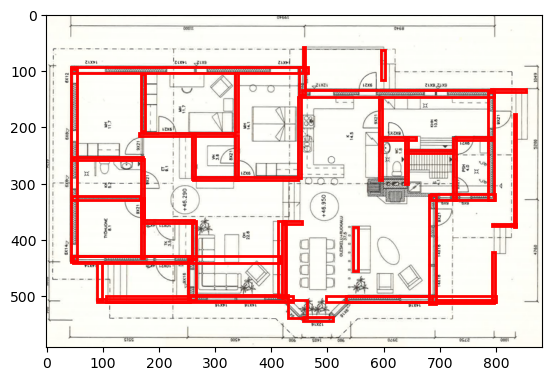

Path: data/cubicasa5k/high_quality_architectural/2536/F1_original.png


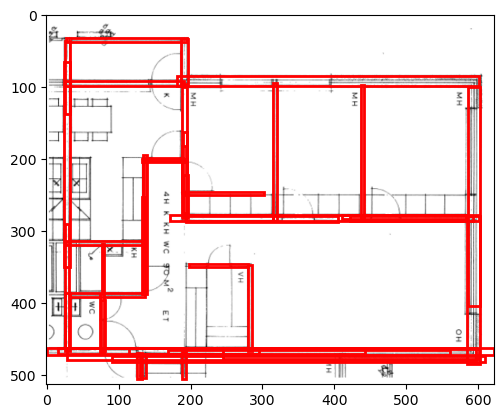

Path: data/cubicasa5k/high_quality_architectural/2530/F1_original.png


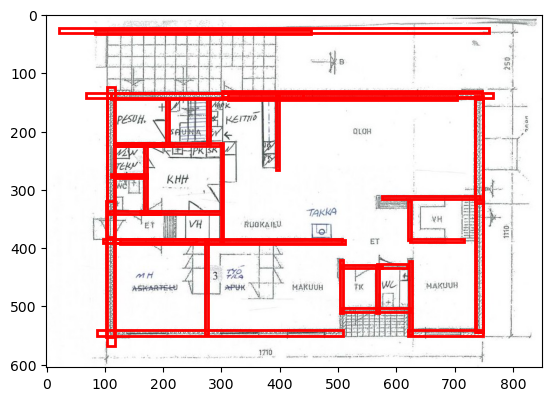

Path: data/cubicasa5k/high_quality_architectural/2504/F1_original.png


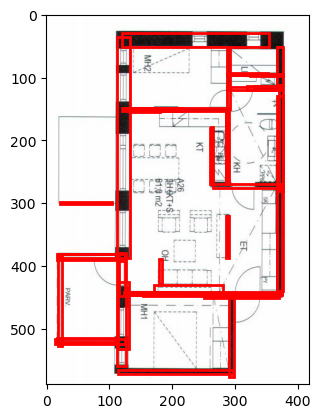

Path: data/cubicasa5k/high_quality_architectural/2207/F1_original.png


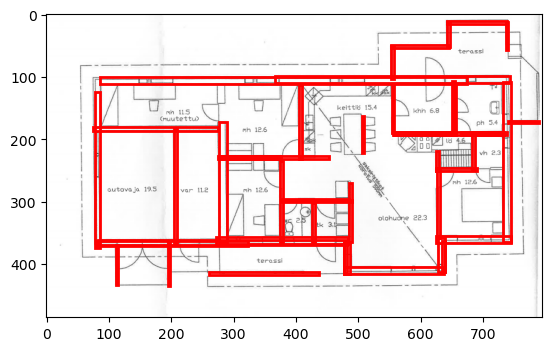

Path: data/cubicasa5k/high_quality_architectural/22/F1_original.png


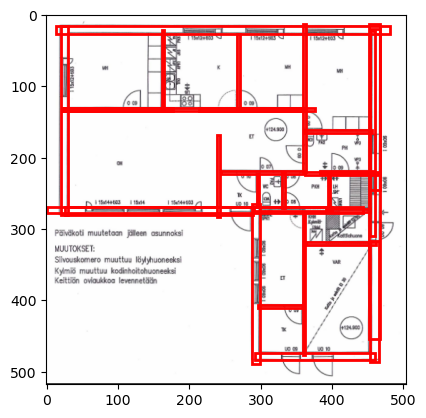

Path: data/cubicasa5k/high_quality_architectural/2090/F1_original.png


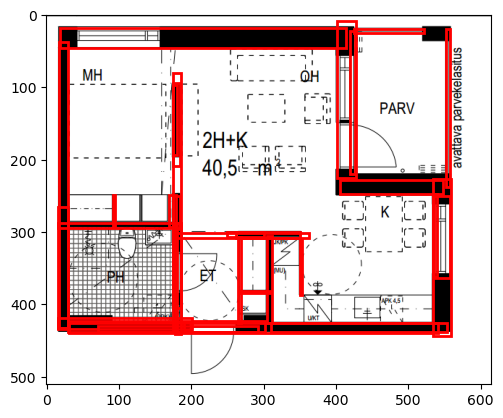

Path: data/cubicasa5k/high_quality_architectural/2085/F1_original.png


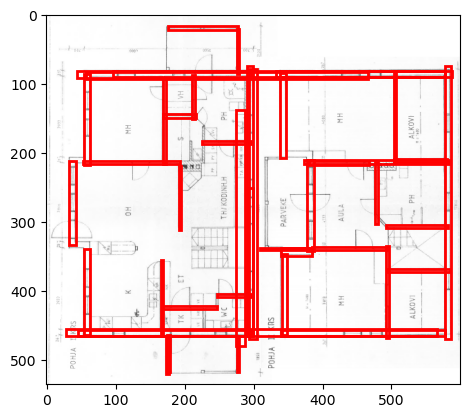

Path: data/cubicasa5k/high_quality_architectural/2014/F1_original.png


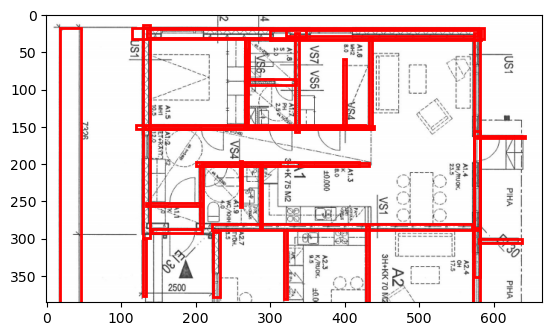

In [5]:
img_paths = [
    'data/cubicasa5k/high_quality_architectural/1191/F1_original.png',
    'data/cubicasa5k/high_quality_architectural/2536/F1_original.png',
    'data/cubicasa5k/high_quality_architectural/2530/F1_original.png',
    'data/cubicasa5k/high_quality_architectural/2504/F1_original.png',
    'data/cubicasa5k/high_quality_architectural/2207/F1_original.png',
    'data/cubicasa5k/high_quality_architectural/22/F1_original.png',
    'data/cubicasa5k/high_quality_architectural/2090/F1_original.png',
    'data/cubicasa5k/high_quality_architectural/2085/F1_original.png',
    'data/cubicasa5k/high_quality_architectural/2014/F1_original.png',
]

for img_path in img_paths:
    print('Path:', img_path)
    draw_bboxes_on_img(img_path)
    plt.show()

## Quantity Analysis

In [6]:
metrics = calculate_metrics(test_data_loader, model, device=device)
metrics

100%|██████████| 400/400 [12:30<00:00,  1.88s/it]


{'acc': 93.28439331054688,
 'dice': 0.736844539642334,
 'iou': 0.5960671305656433,
 'num_samples': 400}